# Init

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# sin cos

In [3]:
sincos_data = [np.sin(np.linspace(0,50,100)),np.cos(np.linspace(0,50,100))]
sincos_data = np.array(sincos_data)
sincos_data = sincos_data[:,:,np.newaxis]
sincos_data = 5+np.transpose(sincos_data,(1,0,2))
sincos_data.shape

(100, 2, 1)

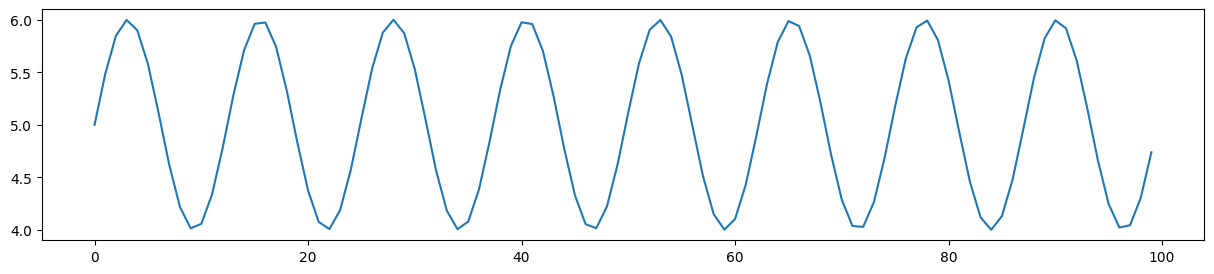

In [4]:
plt.figure(figsize=(15,3))
plt.plot(sincos_data[:,0])

In [5]:
np.save('sincos.npy',sincos_data)

# brownian

In [6]:
def generateGBM(mu=0.006,n=100,dt=0.001,x0=5,seed=42,n_assets=5):
    sigma = np.arange(0, 1, 1.0/n_assets)
    np.random.seed(seed)
    x = np.exp( (mu - sigma ** 2 / 2) * dt 
               + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T )
    x = np.vstack([np.ones(len(sigma)), x])
    x = x0 * x.cumprod(axis=0)
    return x
dataset = generateGBM(mu=0.005,n=1000,dt=1e-5,x0=5,seed=np.random.randint(100),n_assets=5)

tts = 0.8
train_dataset = dataset[:int(tts*len(dataset))]
test_dataset = dataset[int((1-tts)*len(dataset)):]

In [7]:
import matplotlib.pyplot as plt

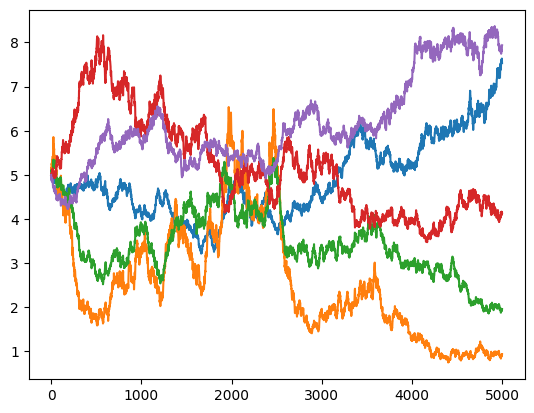

In [26]:
dataset = np.load('brownian_corr.npy')[:,:,0]
plt.plot(dataset[:,:])

In [27]:
from stockstats import wrap
import pandas as pd

In [28]:
df = pd.DataFrame({
    'close' : dataset[:,1],
    'open' :dataset[:,1],
    'low' :dataset[:,1],
    'high' :dataset[:,1],
    'volume' :dataset[:,1],
    'date':np.arange(0,dataset.shape[0]),
    })
# df = df.set_index('date')

In [29]:
df

,close,open,low,high,volume,date
0,5.000000,5.000000,5.000000,5.000000,5.000000,0
1,5.152439,5.152439,5.152439,5.152439,5.152439,1
2,4.955497,4.955497,4.955497,4.955497,4.955497,2
3,5.172431,5.172431,5.172431,5.172431,5.172431,3
4,5.202315,5.202315,5.202315,5.202315,5.202315,4
...,...,...,...,...,...,...
4996,0.902269,0.902269,0.902269,0.902269,0.902269,4996
4997,0.910321,0.910321,0.910321,0.910321,0.910321,4997
4998,0.935386,0.935386,0.935386,0.935386,0.935386,4998
4999,0.919600,0.919600,0.919600,0.919600,0.919600,4999


In [30]:
df = wrap(df)

In [31]:
stats_list = [
    "close", # close price
    "rsi",  # Relative Strength Index (default 14 periods)
    "log-ret",  # Logarithmic return of the close price
    "rsv",  # Raw Stochastic Value
    "stochrsi",  # Stochastic RSI
    "wt1",  # Wave Trend 1
    "wt2",  # Wave Trend 2
    "trix",  # 12 periods Triple Exponential Average (default for close price)
    "tema",  # 5 periods Triple Exponential Moving Average (default for close price)
    "vr",  # 26 periods Volume Variation Index
    "wr",  # 14 periods Williams Overbought/Oversold Index
    "cci",  # 14 periods Commodity Channel Index
    "atr",  # 14 periods Average True Range
    "supertrend",  # Supertrend line
    "dma",  # Difference of 10 periods SMA and 50 periods SMA of close price
    "pdi",  # Positive directional movement line (+DI)
    "ndi",  # Negative directional movement line (-DI)
    "dx",  # Directional index (DX)
    "adx",  # Average directional index (ADX)
    "adxr",  # EMA for ADX
    "kdjk",  # KDJ K series
    "kdjd",  # KDJ D series
    "kdjj",  # KDJ J series
]

In [32]:
len(stats_list)

23

In [33]:
df = df[stats_list]
df.fillna(value=0, inplace=True)

In [34]:
df

,close,rsi,log-ret,rsv,stochrsi,wt1,wt2,trix,tema,vr,...,supertrend,dma,pdi,ndi,dx,adx,adxr,kdjk,kdjd,kdjj
date,,,,,,,,,,,,,,,,,,,,,
0,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,100.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,44.444444,11.111111
1,5.152439,100.000000,0.030032,100.000000,0.000000,121.212121,121.212121,0.484532,5.142683,306.097558,...,5.000000,0.000000,100.000000,-0.000000,100.000000,100.000000,100.000000,55.555556,48.148148,70.370370
2,4.955497,41.817969,-0.038973,0.000000,0.000000,7.543735,64.377928,0.123616,4.993157,102.641561,...,5.319361,0.000000,41.817969,58.182031,16.364062,51.212369,71.540549,37.037037,44.444444,22.222222
3,5.172431,65.576470,0.042845,100.000000,40.834775,39.086989,55.947615,0.133884,5.127121,172.018974,...,5.319361,0.000000,65.576470,34.423530,31.152941,42.194828,58.348436,58.024691,48.971193,76.131687
4,5.202315,67.542719,0.005761,100.000000,44.214251,51.019263,54.715527,0.165616,5.193570,241.797219,...,5.319361,0.000000,67.542719,32.457281,35.085437,39.448746,51.048218,72.016461,56.652949,102.743484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.902269,50.203126,0.017982,100.000000,100.000000,-7.809581,-15.321406,-0.235356,0.899369,119.678549,...,0.863673,-0.048011,50.203126,49.796874,0.406252,6.444383,10.508334,85.664710,73.628939,109.736252
4997,0.910321,52.490125,0.008884,100.000000,100.000000,1.016654,-9.740047,-0.199035,0.908237,119.488887,...,0.872755,-0.039632,52.490125,47.509875,4.980250,6.026059,9.227684,90.443140,79.233673,112.862075
4998,0.935386,58.829542,0.027162,100.000000,100.000000,13.598235,-2.218461,-0.151338,0.929211,119.496699,...,0.895133,-0.030682,58.829542,41.170458,17.659084,9.349781,9.262569,93.628760,84.032035,112.822210


In [35]:
df.to_numpy().shape,len(stats_list)

((5001, 23), 23)

In [36]:
dataset = dataset#generateGBM(mu=0.006,n=1000,dt=0.001,x0=5,seed=42,n_assets=5)
new_dataset = np.zeros((dataset.shape[1],dataset.shape[0],len(stats_list)))
for i in range(dataset.shape[1]):
    df = pd.DataFrame({
    'close' : dataset[:,i],
    'open' :dataset[:,i],
    'low' :dataset[:,i],
    'high' :dataset[:,i],
    'volume' :dataset[:,i],
    'date':np.arange(0,dataset.shape[0]),
    })
    df = wrap(df)
    df = df[stats_list]
    df.fillna(value=0, inplace=True)
    new_dataset[i,:,:] = df.to_numpy()

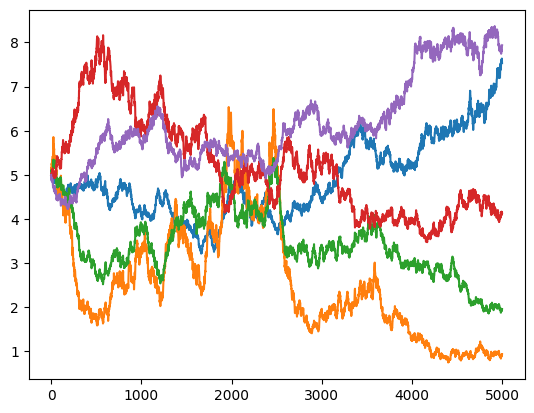

In [37]:
plt.plot(dataset)

In [38]:
new_dataset = new_dataset.transpose(1,0,2)
new_dataset.shape

(5001, 5, 23)

In [39]:
new_dataset[:,:,0][:,:,np.newaxis].shape

(5001, 5, 1)

In [40]:
#np.save('./brownian_corr_stats.npy',new_dataset) # to save new dataset
#np.save('./brownian.npy',new_dataset[:,:,0][:,:,np.newaxis]) # without stats

In [22]:
# new_dataset = np.load('./dataset_stats.npy')

In [23]:
new_dataset.shape

(1001, 5, 23)

# generate sparse/connected DAG dataset

In [24]:
from causalai.data.data_generator import GenerateRandomTimeseriesSEM,GenerateSparseTimeSeriesSEM

In [25]:
sem_dict = GenerateRandomTimeseriesSEM(max_num_parents=5)

In [26]:
sem_dict = {
'a' : [],
'b' : [(('a'),0.5,lambda x:x)],
'c' : [(('b'),0.9,lambda x:x),(('d'),0.2,lambda x:x)],
'd' : [(('a'),0.2,lambda x:x)],
'e' : [(('d'),0.4,lambda x:x)]
}

sparse_sem_dict = {
'a' : [],
'b' : [(('a'),0.5,lambda x:x)],
'c' : [],
'd' : [],
'e' : [(('d'),0.7,lambda x:x)]
}

In [27]:
T = 1000
from causalai.data.data_generator import DataGenerator
dataset, var_names, graph_gt = DataGenerator(sem_dict, T=T, seed=0, discrete=False)
dataset = dataset/10+5

In [28]:
new_dataset = np.zeros((dataset.shape[1],dataset.shape[0],len(stats_list)))
for i in range(dataset.shape[1]):
    df = pd.DataFrame({
    'close' : dataset[:,i],
    'open' :dataset[:,i],
    'low' :dataset[:,i],
    'high' :dataset[:,i],
    'volume' :dataset[:,i],
    'date':np.arange(0,dataset.shape[0]),
    })
    df = wrap(df)
    df = df[stats_list]
    df.fillna(value=0, inplace=True)
    new_dataset[i,:,:] = df.to_numpy()

In [29]:
new_dataset.shape

(5, 1000, 23)

In [30]:
new_dataset = new_dataset.transpose(1,0,2)
new_dataset.shape

(1000, 5, 23)

In [31]:
import matplotlib.pyplot as plt

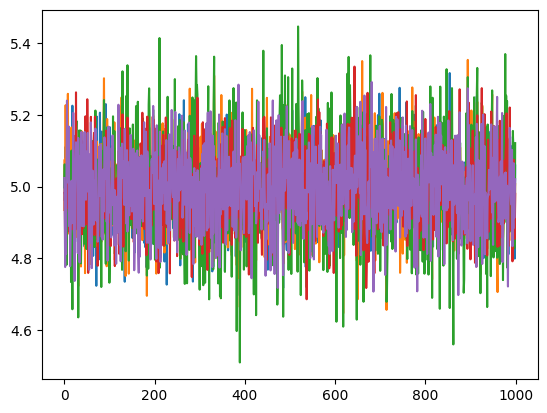

In [32]:
plt.plot(dataset)

In [33]:
# np.save('./dataset_graph.npy',new_dataset)

In [34]:
T = 1000
from causalai.data.data_generator import DataGenerator
dataset, var_names, graph_gt = DataGenerator(sparse_sem_dict, T=T, seed=0, discrete=False)
dataset = dataset/10+5

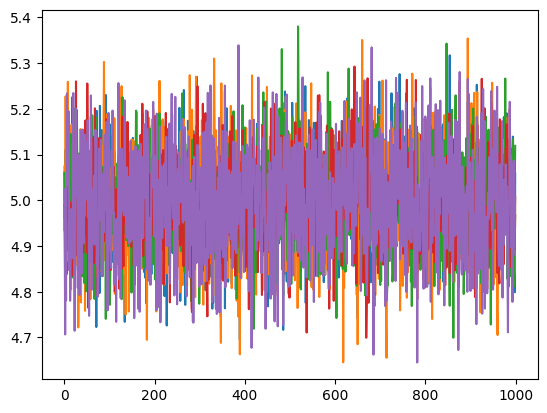

In [35]:
plt.plot(dataset)

In [36]:
new_dataset = np.zeros((dataset.shape[1],dataset.shape[0],len(stats_list)))
for i in range(dataset.shape[1]):
    df = pd.DataFrame({
    'close' : dataset[:,i],
    'open' :dataset[:,i],
    'low' :dataset[:,i],
    'high' :dataset[:,i],
    'volume' :dataset[:,i],
    'date':np.arange(0,dataset.shape[0]),
    })
    df = wrap(df)
    df = df[stats_list]
    df.fillna(value=0, inplace=True)
    new_dataset[i,:,:] = df.to_numpy()

In [37]:
new_dataset = new_dataset.transpose(1,0,2)
new_dataset.shape

(1000, 5, 23)

In [38]:
# np.save('./dataset_sparse.npy',new_dataset)

In [39]:
# generate something more like a stock with causal relations

In [40]:
dataset = generateGBM()

In [41]:
proxy_data = generateGBM()
for i,k in enumerate(sparse_sem_dict):
    v = sparse_sem_dict[k]
    for j,e in enumerate(v):
        proxy_data[:,ord(k)-ord('a')] = proxy_data[:,ord(k)-ord('a')] + proxy_data[:,ord(e[0])-ord('a')]/5*e[1] 
        print(k,e)

b ('a', 0.5, <function <lambda> at 0x000001E5ED47DB20>)
e ('d', 0.7, <function <lambda> at 0x000001E5ED47DBC0>)


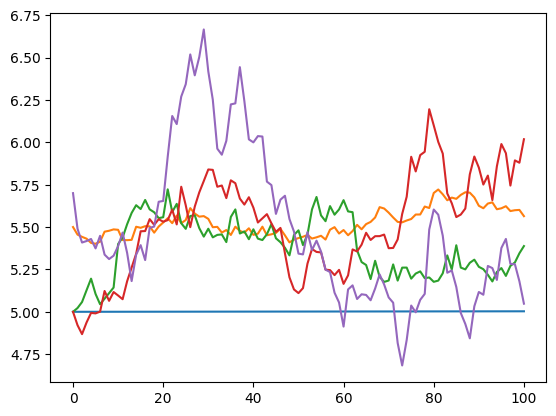

In [42]:
plt.plot(proxy_data)

In [43]:
def generateCausalGBM(sem_dict,mu=0.006,n=100,dt=0.001,x0=5,seed=42,n_assets=5):
    proxy_data = generateGBM(mu,n,dt,x0,seed,n_assets)
    for i,k in enumerate(sem_dict):
        v = sem_dict[k]
        for j,e in enumerate(v):
            proxy_data[1:,ord(k)-ord('a')] = proxy_data[1:,ord(k)-ord('a')] + proxy_data[:-1,ord(e[0])-ord('a')]/5*e[1] 
            print(k,e)
    return proxy_data

b ('a', 0.5, <function <lambda> at 0x000001E5ED47DB20>)
e ('d', 0.7, <function <lambda> at 0x000001E5ED47DBC0>)


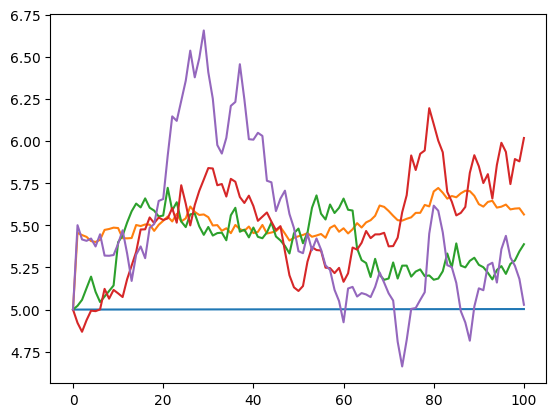

In [44]:
dataset = generateCausalGBM(sparse_sem_dict)
plt.plot(dataset)

b ('a', 0.5, <function <lambda> at 0x000001E5ED47D800>)
c ('b', 0.9, <function <lambda> at 0x000001E5ED47D8A0>)
c ('d', 0.2, <function <lambda> at 0x000001E5ED47D940>)
d ('a', 0.2, <function <lambda> at 0x000001E5ED47D9E0>)
e ('d', 0.4, <function <lambda> at 0x000001E5ED47DA80>)


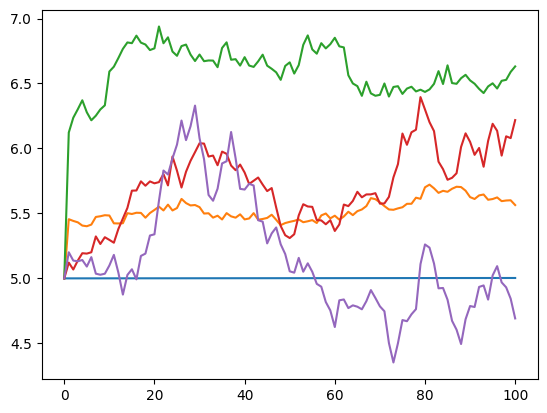

In [45]:
dataset = generateCausalGBM(sem_dict)
plt.plot(dataset)

In [46]:
import numpy as np
import lingam

lower_limit = 0.01

model = lingam.VARLiNGAM(lags=1)
model.fit(dataset)

C:\Users\ishwa\anaconda3\envs\finrl\Lib\site-packages\sklearn\linear_model\_least_angle.py:639: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.109e+07, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
C:\Users\ishwa\anaconda3\envs\finrl\Lib\site-packages\sklearn\linear_model\_least_angle.py:639: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.207e-01, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
C:\Users\ishwa\anaconda3\envs\finrl\Lib\site-packages\sklearn\linear_model\_least_angle.py:639: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.602e-02, with an active set of 3 regressors, and t

In [47]:
from lingam.utils import make_dot

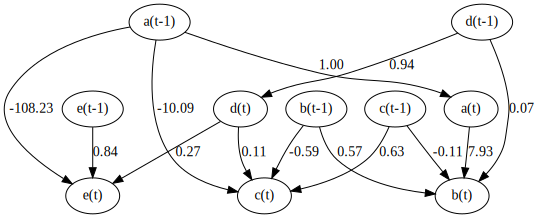

In [48]:
labels = ['a(t)', 'b(t)', 'c(t)', 'd(t)', 'e(t)', 'a(t-1)', 'b(t-1)', 'c(t-1)', 'd(t-1)', 'e(t-1)']
make_dot(np.hstack(model.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)

In [49]:
sparse_sem_dict

{'a': [],
 'b': [('a', 0.5, <function __main__.<lambda>(x)>)],
 'c': [],
 'd': [],
 'e': [('d', 0.7, <function __main__.<lambda>(x)>)]}

# real data

In [50]:
stats_list += ['volume']

In [51]:
!pip install yfinance

In [52]:
import yfinance as yf

In [53]:
tickers = ['GE', 'KO', 'IBM', 'AXP', 'BA', 'WMT', 'CVX', 'DIS', 'MMM']
# Set the start and end dates
start_date = '1973-10-03'
#end_date = '2015-10-03'
end_date = '2024-03-03'

In [54]:
df = yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  9 of 9 completed


In [55]:
df = df.fillna('bfill')

In [56]:
wrap(df.swaplevel(axis=1)['IBM'].drop(['Adj Close'],axis=1))[stats_list].fillna(0)

Price,close,rsi,log-ret,rsv,stochrsi,wt1,wt2,trix,tema,vr,...,dma,pdi,ndi,dx,adx,adxr,kdjk,kdjd,kdjj,volume
Date,,,,,,,,,,,,,,,,,,,,,
1973-10-03,14.848231,0.000000,0.000000,18.518466,0.000000,0.000000,0.000000,0.000000,14.848231,100.000000,...,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,39.506155,46.502052,25.514362,2466886
1973-10-04,15.027486,100.000000,0.012000,72.222350,0.000000,-121.212121,-121.212121,0.191863,15.016014,245.318916,...,0.000000,0.000000,17.622471,100.000000,100.000000,100.000000,50.411554,47.805219,55.624223,1792426
1973-10-05,15.505497,100.000000,0.031314,85.294104,0.000000,25.588493,-47.811814,0.332688,15.446326,340.434297,...,0.000000,46.967541,9.345630,66.808370,80.638216,88.705626,62.039070,52.549836,81.017539,1173194
1973-10-08,15.639938,100.000000,0.008633,90.540576,0.000000,55.178238,-13.481797,0.370905,15.651039,408.005558,...,0.000000,38.449697,6.630643,70.582994,76.117978,83.046959,71.539572,58.879748,96.859220,833453
1973-10-09,15.639938,100.000000,0.000000,90.540576,0.000000,64.820811,6.093855,0.366032,15.695053,408.005558,...,0.000000,38.449697,6.630643,70.582994,73.980028,79.544755,77.873240,65.210912,103.197896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26,184.130005,55.847436,-0.008598,52.745162,32.661579,25.070240,25.090175,0.262133,184.385533,122.755632,...,11.119801,30.329674,22.026894,15.858143,20.207355,27.236478,52.305088,50.428046,56.059173,4620800
2024-02-27,184.869995,56.991670,0.004011,59.999970,38.616239,22.178402,23.947937,0.237516,184.775859,118.164217,...,10.565800,28.702679,23.922849,9.082721,17.028888,24.320024,54.870049,51.908714,60.792720,3641400
2024-02-28,185.300003,57.678042,0.002323,64.215735,42.188160,22.123833,23.752253,0.216475,185.232326,115.774148,...,10.278001,28.078850,22.961040,10.027079,15.028371,21.665266,57.985278,53.934235,66.087363,3216300


In [57]:
df.iloc[int(0.9*len(df))]

Price      Ticker
Adj Close  AXP       9.940309e+01
           BA        4.011003e+02
           CVX       9.425098e+01
           DIS       1.075311e+02
           GE        4.658932e+01
           IBM       1.021692e+02
           KO        4.214570e+01
           MMM       1.330957e+02
           WMT       2.964435e+01
Close      AXP       1.070000e+02
           BA        4.107200e+02
           CVX       1.187200e+02
           DIS       1.092000e+02
           GE        4.782853e+01
           IBM       1.300669e+02
           KO        4.966000e+01
           MMM       1.727174e+02
           WMT       3.232333e+01
High       AXP       1.074300e+02
           BA        4.112100e+02
           CVX       1.188700e+02
           DIS       1.108300e+02
           GE        4.864324e+01
           IBM       1.302103e+02
           KO        4.980000e+01
           MMM       1.729013e+02
           WMT       3.239000e+01
Low        AXP       1.062600e+02
           BA        4.054000e

In [58]:
real_dataset = np.zeros((df.shape[0],len(tickers),len(stats_list) ))
for i in range(len(tickers)):
    real_dataset[:,i,:] = wrap(df.swaplevel(axis=1)[tickers[i]].drop(['Adj Close'],axis=1))[stats_list].fillna(0).to_numpy()
real_dataset[:,0,0],real_dataset.shape

(array([  6.37743616,   6.41487694,   6.62704182, ..., 124.18994141,
        125.21149445, 126.61611938]),
 (12713, 9, 24))

In [59]:
real_dataset[real_dataset==np.inf] = 1e9

In [64]:
#np.save('dataset_real.npy',real_dataset)
#np.save('dataset_real_close',real_dataset[:,:,0][:,:,np.newaxis])
dat = np.load('dataset_real_close.npy')
print(dat.shape)

(12713, 9, 1)


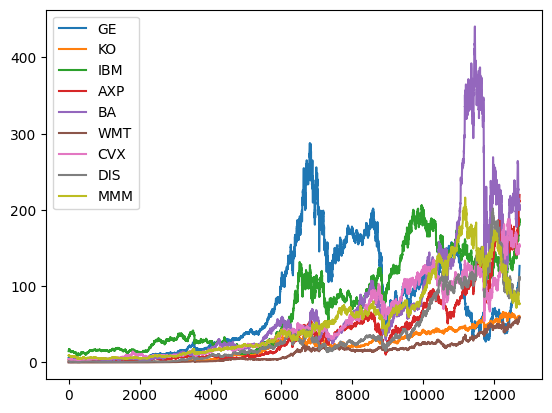

In [65]:
plt.plot(real_dataset[:,:,0],label=tickers)
plt.show
plt.legend()

In [66]:
real_dataset.shape

(12713, 9, 24)

In [67]:
df.index[int(len(df)*0.9)]

Timestamp('2019-02-12 00:00:00')

In [68]:
len(df)

12713

In [69]:
np.sum(np.isinf(real_dataset)),np.sum(np.isneginf(real_dataset)),np.sum(np.isnan(real_dataset))

(0, 0, 0)

## single real dataset

In [63]:
ticker = ['IBM']
# Set the start and end dates
start_date = '1973-10-03'
#end_date = '2015-10-03'
end_date = '2024-03-03'

In [64]:
df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [65]:
df = df.fillna('bfill')

In [66]:
real_dataset1 = np.zeros((df.shape[0],len(ticker),len(stats_list)))

In [67]:
real_dataset1[:,0,:] = wrap(df)[stats_list].fillna(0).to_numpy()
real_dataset1[:,0,0],real_dataset1.shape

(array([ 14.84823132,  15.02748585,  15.50549698, ..., 185.30000305,
        185.02999878, 188.19999695]),
 (12713, 1, 24))

In [68]:
real_dataset1[real_dataset1==np.inf] = 1e9

In [69]:
#np.save('dataset_IBM.npy',real_dataset1)
dat = np.load('dataset_IBM.npy')
print(dat.shape)

(12713, 1, 24)


In [70]:
np.sum(np.isinf(dat)),np.sum(np.isneginf(dat)),np.sum(np.isnan(dat))

(0, 0, 0)

**normalize dataset without losing information**

In [71]:
dat[-2500:,0,0]

array([181.48184204, 182.0745697 , 184.02485657, ..., 185.30000305,
       185.02999878, 188.19999695])

In [72]:
df.iloc[int(0.8*len(df))]

open         1.732792e+02
high         1.747706e+02
low          1.717400e+02
close        1.717400e+02
adj close    1.118508e+02
volume       7.207568e+06
Name: 2014-01-24 00:00:00, dtype: float64

In [73]:
def normalize(col):
    mn = col.min()
    mx = col.max()
    return (col - mn)/((mx - mn)+1e-9)
for i in range(dat.shape[2]):
    dat[:,0,i] = normalize(dat[:,0,i])

In [74]:
np.sum(np.isinf(dat)),np.sum(np.isneginf(dat)),np.sum(np.isnan(dat))

(0, 0, 0)

In [75]:
#np.save('norm_dataset_IBM.npy',dat)

In [96]:
wrap(df)[stats_list].mean() / (10**np.log(1+abs(wrap(df)[stats_list].mean().to_numpy()))//1)

close         3.573031e-03
rsi           5.669816e-03
log-ret       1.997659e-04
rsv           5.593669e-03
stochrsi      5.803830e-03
wt1           1.157625e-01
wt2           1.153232e-01
trix          2.011128e-02
tema          3.573027e-03
vr            2.053251e-03
wr           -6.200486e-03
cci           8.405681e-02
atr           2.077076e-01
supertrend    3.583630e-03
dma           2.574890e-01
pdi           1.464364e-02
ndi           1.515973e-02
dx            1.357349e-02
adx           1.356602e-02
adxr          1.355872e-02
kdjk          5.593918e-03
kdjd          5.594339e-03
kdjj          5.593679e-03
volume        1.450107e-09
dtype: float64

In [100]:
(10**np.log(1+abs(wrap(df)[stats_list].mean().to_numpy()))//1)

array([2.06630000e+04, 9.04100000e+03, 1.00000000e+00, 9.26300000e+03,
       8.67000000e+03, 2.90000000e+01, 2.90000000e+01, 1.00000000e+00,
       2.06630000e+04, 5.54750000e+04, 7.69900000e+03, 5.70000000e+01,
       7.00000000e+00, 2.05540000e+04, 1.00000000e+00, 1.62600000e+03,
       1.52600000e+03, 1.86700000e+03, 1.86900000e+03, 1.87100000e+03,
       9.26200000e+03, 9.26100000e+03, 9.26300000e+03, 4.20755674e+15])

# dow jones 30

In [51]:
# List of DJIA stocks
tickers = [
    "MMM", "AXP", "AAPL", "AMGN", "BA", "BAC", "CAT", "CVX",
    "CSCO", "ADBE", "GS", "HD", "HON", "IBM", "INTC", "JNJ",
    "JPM", "KO", "MCD", "MRK", "MSFT", "NKE", "PGR", "TRV",
    "UNH", "VZ", "WBA", "WMT", "DIS", "GOOG"
]

In [52]:
import yfinance as yf
import pandas as pd
import numpy as np

In [53]:
min_date = pd.Timestamp('1962-01-02 00:00:00-0500', tz='America/New_York')
for i in range(len(tickers)):
    stock = yf.Ticker(tickers[i])
    data = stock.history(period="max")
    min_date = max(data.index[0],min_date)
    print(tickers[i],data.index[0])

MMM 1962-01-02 00:00:00-05:00
AXP 1972-06-01 00:00:00-04:00
AAPL 1980-12-12 00:00:00-05:00
AMGN 1983-06-17 00:00:00-04:00
BA 1962-01-02 00:00:00-05:00
BAC 1973-02-21 00:00:00-05:00
CAT 1962-01-02 00:00:00-05:00
CVX 1962-01-02 00:00:00-05:00
CSCO 1990-02-16 00:00:00-05:00
ADBE 1986-08-13 00:00:00-04:00
GS 1999-05-04 00:00:00-04:00
HD 1981-09-22 00:00:00-04:00
HON 1962-01-02 00:00:00-05:00
IBM 1962-01-02 00:00:00-05:00
INTC 1980-03-17 00:00:00-05:00
JNJ 1962-01-02 00:00:00-05:00
JPM 1980-03-17 00:00:00-05:00
KO 1962-01-02 00:00:00-05:00
MCD 1966-07-05 00:00:00-04:00
MRK 1962-01-02 00:00:00-05:00
MSFT 1986-03-13 00:00:00-05:00
NKE 1980-12-02 00:00:00-05:00
PGR 1980-03-17 00:00:00-05:00
TRV 1975-11-17 00:00:00-05:00
UNH 1984-10-17 00:00:00-04:00
VZ 1983-11-21 00:00:00-05:00
WBA 1980-03-17 00:00:00-05:00
WMT 1972-08-25 00:00:00-04:00
DIS 1962-01-02 00:00:00-05:00
GOOG 2004-08-19 00:00:00-04:00


In [54]:
len(tickers)

30

In [55]:
min_date.date()

datetime.date(2004, 8, 19)

In [56]:
start_date = min_date
#end_date = '2015-10-03'
end_date = '2024-03-03'

In [57]:
df = yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  30 of 30 completed


In [58]:
df['Adj Close']

Ticker,AAPL,ADBE,AMGN,AXP,BA,BAC,CAT,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PGR,TRV,UNH,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2004-08-19,0.464269,22.649828,41.256195,32.460182,35.039742,27.961683,21.552998,12.952653,22.432081,17.967457,...,33.503490,21.097301,16.930803,7.279040,10.911884,21.439190,26.143305,13.320614,22.984060,12.235217
2004-08-20,0.465630,23.029572,41.838478,32.570923,35.186180,28.229626,21.840208,12.803463,22.692312,17.999550,...,33.624992,21.403872,16.980742,7.339331,10.972473,21.575867,26.413197,13.439401,22.909756,12.188381
2004-08-23,0.469863,22.799728,41.730640,32.375504,35.318649,28.165846,21.782774,13.006905,22.436907,17.782972,...,33.662689,21.468891,17.055880,7.307702,10.964020,21.215549,26.167477,13.391889,22.637323,11.998807
2004-08-24,0.483015,22.849693,42.291363,32.408081,35.499962,28.290226,22.115334,12.864491,22.480282,17.895266,...,33.754848,21.529278,17.055880,7.360088,11.092245,21.221762,26.175535,13.334188,22.748777,12.012191
2004-08-25,0.499645,23.104523,42.636429,32.538368,36.608685,28.287039,22.333002,13.101847,22.600742,18.047670,...,34.014565,21.375998,17.249975,7.417412,11.254289,21.507530,26.252069,13.293465,22.785923,12.065718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26,181.160004,560.479980,286.369995,216.289886,200.539993,33.374897,324.198212,48.007782,154.449997,107.680000,...,76.772575,128.027893,407.540009,104.167831,193.487839,219.082443,523.257263,39.057507,20.990000,59.397701
2024-02-27,182.630005,552.489990,278.489990,217.306717,201.399994,34.040211,326.440063,47.918510,152.160004,109.419998,...,77.173912,128.216705,407.480011,104.775658,192.088486,220.874298,511.403961,39.293686,21.629999,59.387737
2024-02-28,181.419998,551.820007,277.459991,217.356567,207.000000,34.070004,328.363037,47.670536,152.339996,110.800003,...,76.471573,127.381996,407.720001,103.978508,191.938568,219.420898,496.323425,39.460976,21.160000,59.417633


In [59]:
df = df.fillna('bfill')

In [60]:
wrap(df.swaplevel(axis=1)['IBM'].drop(['Adj Close'],axis=1))[stats_list].fillna(0)

Price,close,rsi,log-ret,rsv,stochrsi,wt1,wt2,trix,tema,vr,...,supertrend,dma,pdi,ndi,dx,adx,adxr,kdjk,kdjd,kdjj
Date,,,,,,,,,,,,,,,,,,,,,
2004-08-19,81.156792,0.000000,0.000000,48.889401,0.000000,0.000000,0.000000,0.000000,81.156792,100.000000,...,83.747608,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,49.629800,49.876600,49.136201
2004-08-20,81.500954,100.000000,0.004232,88.888692,0.000000,121.212121,121.212121,0.067396,81.478927,291.365697,...,83.480446,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,62.716098,54.156433,79.835427
2004-08-23,80.927345,35.779613,-0.007063,20.000319,0.000000,25.212876,73.212498,0.007824,81.031173,103.641383,...,83.480446,0.000000,8.873781,-0.000000,100.000000,100.000000,100.000000,48.477505,52.263457,40.905601
2004-08-24,80.984703,39.933608,0.000709,32.727312,6.468344,-37.349090,36.358635,-0.009490,80.961486,144.628242,...,83.333138,0.000000,6.419802,10.370450,23.529412,55.392157,73.978758,43.227441,49.251451,31.179419
2004-08-25,81.328873,57.639535,0.004241,65.454625,34.038914,-7.213224,25.465671,-0.007175,81.214522,211.250048,...,83.333138,0.000000,8.585538,8.178397,2.428671,31.582883,54.920062,50.636502,49.713135,52.483236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26,184.130005,55.847436,-0.008598,52.745162,32.661579,25.070240,25.090175,0.262133,184.385533,122.755632,...,191.420314,11.119801,30.329674,22.026894,15.858143,20.207355,27.236478,52.305088,50.428046,56.059173
2024-02-27,184.869995,56.991670,0.004011,59.999970,38.616239,22.178402,23.947937,0.237516,184.775859,118.164217,...,191.420314,10.565800,28.702679,23.922849,9.082721,17.028888,24.320024,54.870049,51.908714,60.792720
2024-02-28,185.300003,57.678042,0.002323,64.215735,42.188160,22.123833,23.752253,0.216475,185.232326,115.774148,...,191.420314,10.278001,28.078850,22.961040,10.027079,15.028371,21.665266,57.985278,53.934235,66.087363


In [61]:
real_dataset = np.zeros((df.shape[0],len(tickers),len(stats_list) ))
for i in range(len(tickers)):
    real_dataset[:,i,:] = wrap(df.swaplevel(axis=1)[tickers[i]].drop(['Adj Close'],axis=1))[stats_list].fillna(0).to_numpy()
real_dataset[:,0,0],real_dataset.shape

(array([66.87290955, 67.11538696, 67.19063568, ..., 76.47157288,
        77.02341461, 76.80602264]),
 (4917, 30, 23))

In [62]:
real_dataset[real_dataset==np.inf] = 1e9

In [63]:
np.sum(np.isinf(real_dataset)),np.sum(np.isneginf(real_dataset)),np.sum(np.isnan(real_dataset)),len(df)

(0, 0, 0, 4917)

In [64]:
np.save('dow_30.npy',real_dataset)
dat = np.load('dow_30.npy')
print(dat.shape)

(4917, 30, 23)
